In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Import the model package - Logistic Regressor

In [60]:
from sklearn.linear_model import LogisticRegression

## Fetch the Dataset - IRIS

In [61]:
iris = datasets.load_iris()

## Get the feature names

In [62]:
iris.keys() # What is contained in the dataset?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [63]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [64]:
iris.data.shape

(150, 4)

In [65]:
iris.target.shape

(150,)

## Convert Data to a dataframe

In [87]:
target_dict = {}
target_dict_converter = {}
for index,name in enumerate(iris.target_names):
    target_dict[index] = name
    target_dict_converter[name] = index

In [67]:
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [68]:
targets = [target_dict[int(x)] for x in iris.target]
targets = np.array([targets]).T

In [79]:
total = np.hstack((iris.data, targets))
np.random.shuffle(total)

In [80]:
df = pd.DataFrame(total, columns=iris.feature_names + ['target'])

In [81]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,2.5,5.0,2.0,virginica
1,6.0,3.0,4.8,1.8,virginica
2,6.7,3.1,4.7,1.5,versicolor
3,5.0,3.4,1.5,0.2,setosa
4,5.8,2.7,5.1,1.9,virginica
...,...,...,...,...,...
145,6.7,3.0,5.0,1.7,versicolor
146,4.4,3.0,1.3,0.2,setosa
147,4.6,3.4,1.4,0.3,setosa
148,6.6,3.0,4.4,1.4,versicolor


## Train the Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [90]:
X = total[:,:4]
Y = total[:,4]
Y = np.array([target_dict_converter[x] for x in Y])

In [92]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0)

## Feature Plot
Features of the dataset are represented as a 4D scatter plot.

```
x_{axis} = Petal Length
y_{axis} = Petal width
z_{axis} = Sepal Length
size     = Sepal width
color    = target
``` 

Text(0.5, 0, 'sepal length (cm)')

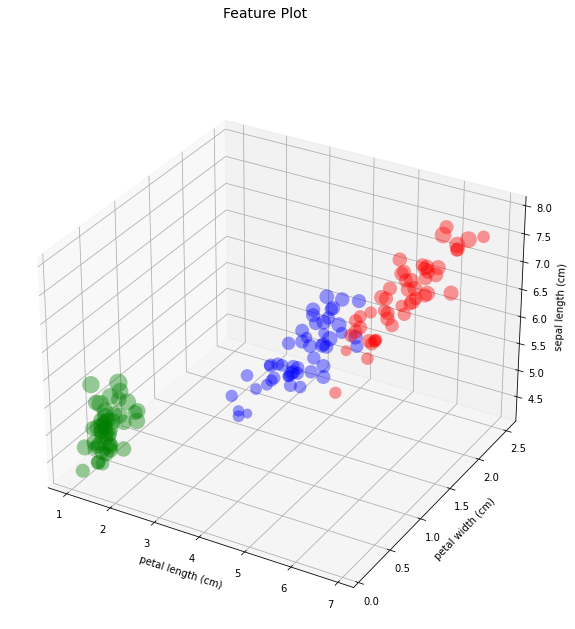

In [114]:
fig = plt.figure(figsize=(15, 10))
t = fig.suptitle('Feature Plot', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

palette = {
    'virginica': 'red',
    'setosa': 'green',
    'versicolor': 'blue'
}

xs = list(df['petal length (cm)'].astype(float))
ys = list(df['petal width (cm)'].astype(float))
zs = list(df['sepal length (cm)'].astype(float))

min_size = df['sepal width (cm)'].astype(float).min() - 1
ss = list((df['sepal width (cm)'].astype(float) - min_size) * 100) # size factor
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = [palette[wt] for wt in list(df['target'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    #label = list(palette.keys())[list(palette.values()).index(color)]
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_zlabel('sepal length (cm)')

In [105]:
df['sepal width (cm)'].astype(float).max()

4.4